In [1]:
library(dplyr)
library(Seurat)
library(patchwork)
library(stringr)
library(Matrix)
library(R.utils)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

rgeos version: 0.6-3, (SVN revision 696)
 GEOS runtime version: 3.11.0-CAPI-1.17.0 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 1.6-0 
 Polygon checking: TRUE 


Attaching SeuratObject

Attaching sp

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfu

In [2]:
all_dir=list.dirs('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10')
all_dir=str_extract(all_dir,'.*[0-9][0-9][0-9]$')
all_dir=all_dir[-c(1:length(all_dir))[is.na(all_dir)]]
length(all_dir)
all_dir


[1] 8

[1] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6121-1-220811"
[2] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6121-2-220811"
[3] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6157-1-220811"
[4] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6157-2-220811"
[5] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6161-1-220811"
[6] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6161-2-220811"
[7] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6460-1-220823"
[8] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6460-2-220823"

In [3]:
for(i in c(1:8)){matrix_dir=all_dir[i]

if(file.exists(paste0(matrix_dir,"/barcodes.tsv.gz"))){
    #gunzip(paste0(matrix_dir,"/barcodes.tsv.gz"))
    #gunzip(paste0(matrix_dir,"/matrix.mtx.gz"))
    #gunzip(paste0(matrix_dir,"/genes.tsv.gz"))

    barcode.path<-paste0(matrix_dir,"/barcodes.tsv.gz")
    genes.path<-paste0(matrix_dir,"/features.tsv.gz")
    matrix.path<-paste0(matrix_dir,"/matrix.mtx.gz")

    zebrafish.data <- readMM(file = matrix.path) ##mac上不能读压缩文件
    gene.names = read.delim(genes.path,header = FALSE, stringsAsFactors = FALSE)
    barcode.names = read.delim(barcode.path,header = FALSE,stringsAsFactors = FALSE)
    colnames(zebrafish.data) = barcode.names$V1
    rownames(zebrafish.data) = gene.names$V1 ##把示例中的V1改成V2

    # check矩阵
    zebrafish.data[1:6, 1:6] ##check矩阵
    dim(zebrafish.data) ##check矩阵

    scRNA <- CreateSeuratObject(counts = zebrafish.data)

    saveRDS(scRNA,paste0(matrix_dir,'/counts.rds'))
}else{
    matrix_dir=paste0(matrix_dir,'/04.Matrix')
    #gunzip(paste0(matrix_dir,"/barcodes.tsv.gz"))
    #gunzip(paste0(matrix_dir,"/matrix.mtx.gz"))
    #gunzip(paste0(matrix_dir,"/genes.tsv.gz"))

    barcode.path<-paste0(matrix_dir,"/barcodes.tsv.gz")
    genes.path<-paste0(matrix_dir,"/features.tsv.gz")
    matrix.path<-paste0(matrix_dir,"/matrix.mtx.gz")

    zebrafish.data <- readMM(file = matrix.path) ##mac上不能读压缩文件
    gene.names = read.delim(genes.path,header = FALSE, stringsAsFactors = FALSE)
    barcode.names = read.delim(barcode.path,header = FALSE,stringsAsFactors = FALSE)
    colnames(zebrafish.data) = barcode.names$V1
    rownames(zebrafish.data) = gene.names$V1 ##把示例中的V1改成V2

    # check矩阵
    zebrafish.data[1:6, 1:6] ##check矩阵
    dim(zebrafish.data) ##check矩阵

    scRNA <- CreateSeuratObject(counts = zebrafish.data)

    saveRDS(scRNA,paste0(matrix_dir,'/counts.rds'))
}}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [4]:
read_file='aba'
for(i in c(1:8)){
matrix_dir=all_dir[i]
if(file.exists(paste0(matrix_dir,"/counts.rds"))){
    read_file=c(read_file,(paste0(matrix_dir,"/counts.rds")))
}else{
    matrix_dir=paste0(matrix_dir,'/04.Matrix')
    read_file=c(read_file,(paste0(matrix_dir,"/counts.rds")))
}}
read_file=read_file[-1]
read_file

[1] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6121-1-220811/counts.rds"
[2] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6121-2-220811/counts.rds"
[3] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6157-1-220811/counts.rds"
[4] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6157-2-220811/counts.rds"
[5] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6161-1-220811/counts.rds"
[6] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6161-2-220811/counts.rds"
[7] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6460-1-220823/counts.rds"
[8] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/data_2022_10_10/6460-2-220823/counts.rds"

In [5]:
sceList = lapply(read_file,function(folder){ 
    readRDS(folder)
})

In [6]:
read_file_renew=str_extract(read_file,'[0-9][0-9][0-9][0-9]-[0-9]')

read_file_renew

sce.big <- merge(sceList[[1]], 
                 y = c(sceList[[2]],sceList[[3]],sceList[[4]],sceList[[5]],sceList[[6]],sceList[[7]],sceList[[8]]), 
                 add.cell.ids = read_file_renew,
                 project = "macaca")

table(sce.big$orig.ident)

sce.big@meta.data$group=str_extract(rownames(sce.big@meta.data),'[0-9][0-9][0-9][0-9]-[0-9]')





[1] "6121-1" "6121-2" "6157-1" "6157-2" "6161-1" "6161-2" "6460-1" "6460-2"


SeuratProject 
        32885 

In [8]:
saveRDS(sce.big,'/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/post_compare_analysis/Insular_raw_unfil.rds')




In [14]:
seurat=sce.big
#去除 median nfeature <500
df_meta=seurat@meta.data
group_med_feature=df_meta %>% group_by(group)  %>% summarise(med=median(nFeature_RNA))
select_group=group_med_feature[group_med_feature$med > 500,]$group

In [21]:

suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
suppressMessages(library(SeuratData))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(ggsci))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(LSD))
suppressMessages(library(readxl))
suppressMessages(library(ggrepel))
suppressMessages(library(randomForest))
suppressMessages(library(harmony))



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


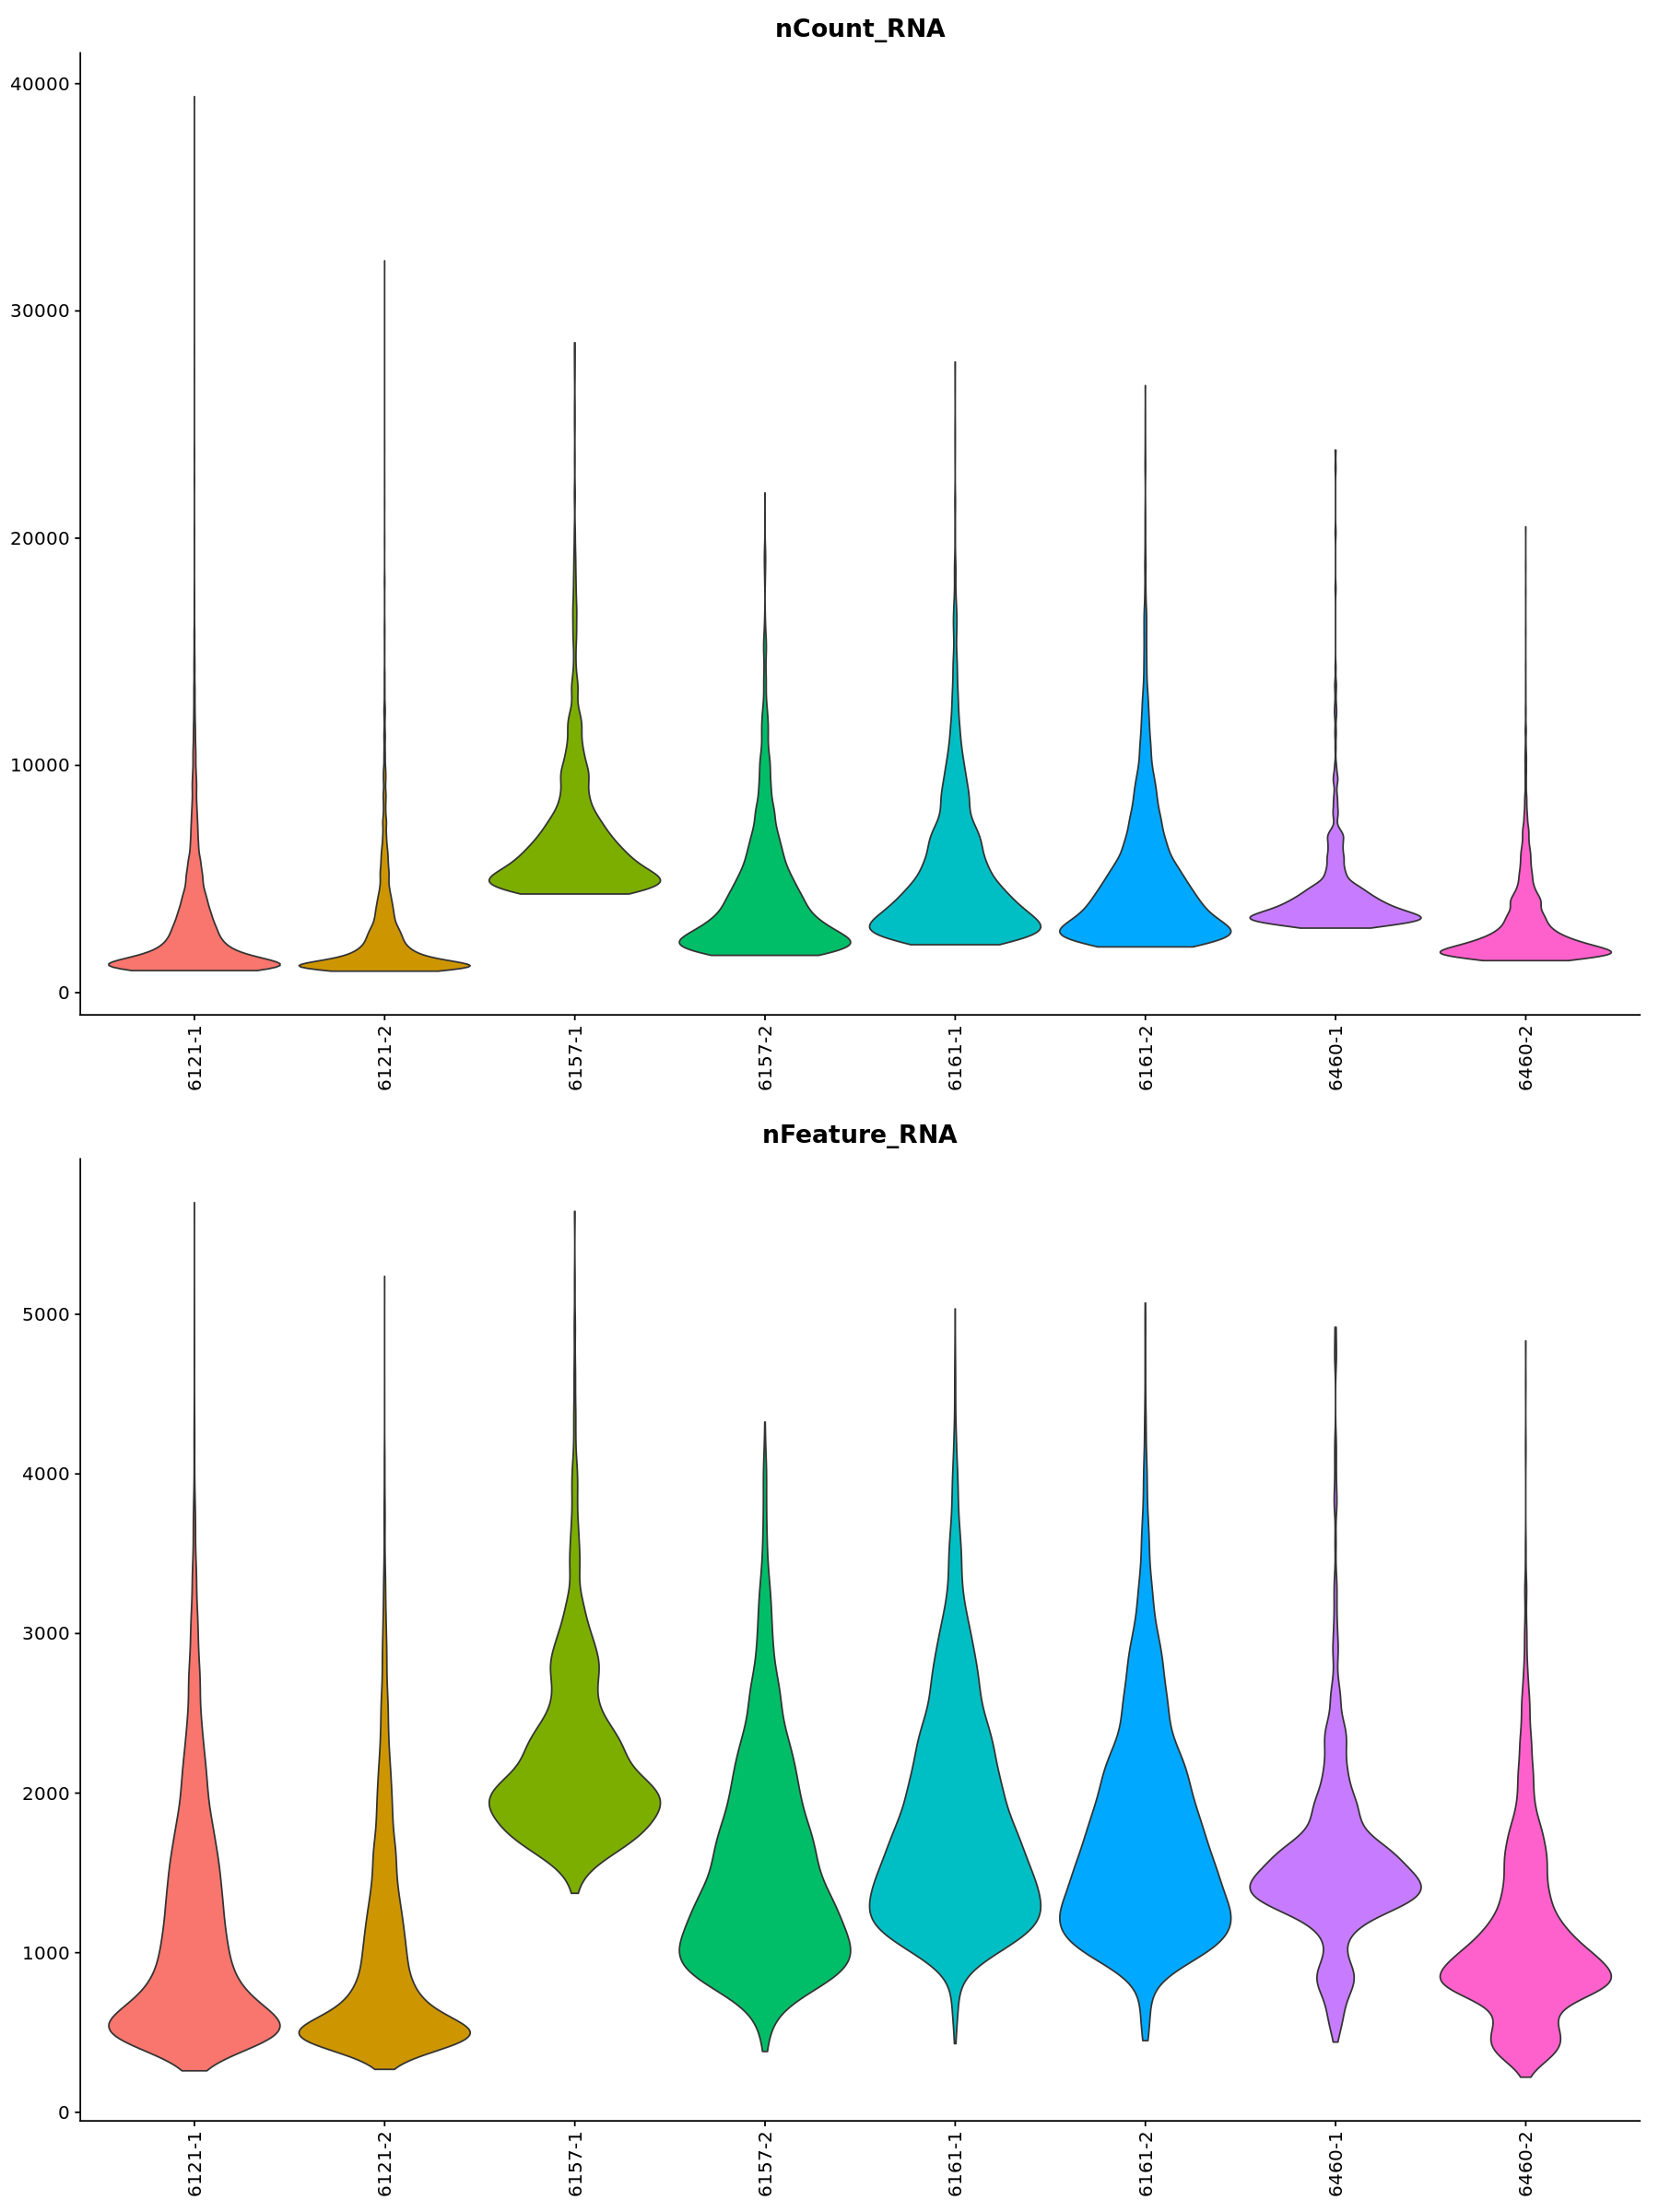

In [22]:
Idents(seurat) = "group"
options(repr.plot.width=15, repr.plot.height=20)
print(plot_grid(
    plotlist = lapply(c("nCount_RNA", "nFeature_RNA"), function(x) {
        p = VlnPlot(seurat, features=x, pt.size=0) + 
            theme(axis.text.x=element_text(vjust=0.5, hjust=0.5, angle=90), axis.title.x = element_blank()) +
            guides(fill=FALSE)
        return(p)
    }), 
    ncol=1, align="hv", axis="tblr"
))

In [23]:
seurat = subset(seurat, nFeature_RNA > 300 )

In [24]:
seurat


An object of class Seurat 
20490 features across 32861 samples within 1 assay 
Active assay: RNA (20490 features, 0 variable features)

In [25]:
saveRDS(seurat,'/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/post_compare_analysis/Insular_nFeature800.rds')




In [ ]:
seurat=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/compare_to_Insular/ma_fas_V2_snRNA_data/post_compare_analysis/Insular_nFeature800.rds')

